In [51]:
# Imports

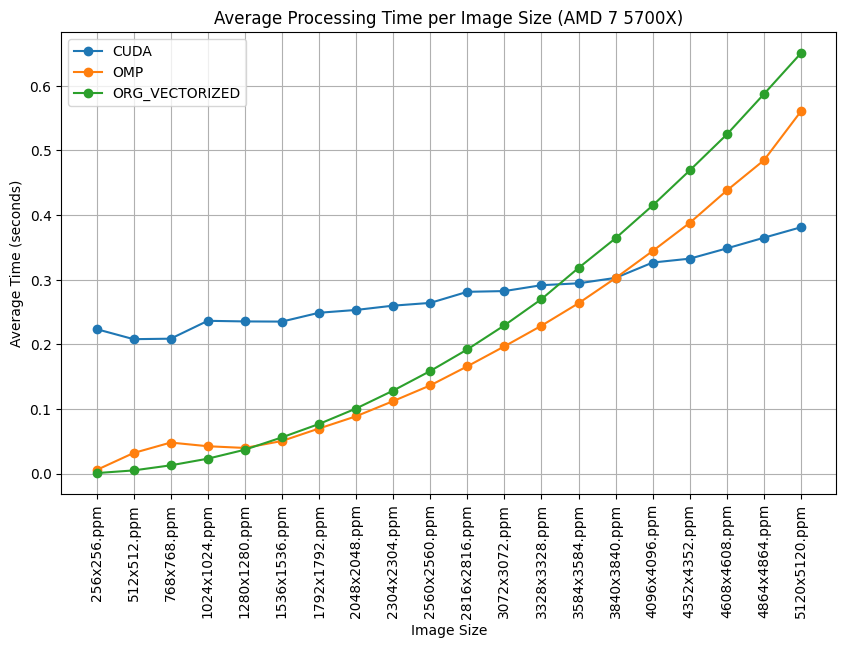

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths
results_folder = "../results"
csv_suffixes = [
    "CUDA",
    "OMP",
    "ORG_VECTORIZED",
    # "ORG_NOT_VECTORIZED",
]

# Initialize a dictionary to hold the data
data = {suffix: {} for suffix in csv_suffixes}
image_types = set()

# Load the data from the CSV files
for suffix in csv_suffixes:
    for file_name in os.listdir(results_folder):
        if file_name.endswith(f"_{suffix}_timing_results.csv"):
            # Extract the image type from the file name
            image_type = file_name.split("_")[0]
            image_types.add(image_type)

            # Read the CSV file
            csv_path = os.path.join(results_folder, file_name)
            df = pd.read_csv(csv_path, header=None, names=["wall_time", "cpu_time"])

            # Calculate the average wall time
            avg_wall_time = df["wall_time"].mean() / 1000  # Convert milliseconds to seconds

            # Store the result
            if image_type not in data[suffix]:
                data[suffix][image_type] = []
            data[suffix][image_type].append(avg_wall_time)

# Create a DataFrame for plotting
plot_data = {suffix: [] for suffix in csv_suffixes}
ordered_image_types = sorted(image_types, key=lambda x: int(x.split("x")[0]))

for suffix in csv_suffixes:
    for image_type in ordered_image_types:
        if image_type in data[suffix]:
            avg_time = sum(data[suffix][image_type]) / len(data[suffix][image_type])
            plot_data[suffix].append(avg_time)
        else:
            plot_data[suffix].append(None)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(plot_data, index=ordered_image_types)

# Plot the results with ordered image types
plt.figure(figsize=(10, 6))
for suffix in csv_suffixes:
    plt.plot(ordered_image_types, plot_df[suffix], marker="o", label=suffix)

plt.xlabel("Image Size")
plt.xticks(rotation=90)  # Rotate labels to 90 degrees
plt.ylabel("Average Time (seconds)")
plt.title("Average Processing Time per Image Size (AMD 7 5700X)")
plt.legend()
plt.grid(True)
plt.show()
